<a href="https://colab.research.google.com/github/Khamidrees/DEEPTECH-READY-/blob/main/Week_2_COVI_FE2388375733.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
# Replace with your image path or use a sample image
image_path = "/content/alan-king-KZv7w34tluA-unsplash.jpg"
image = Image.open(image_path).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

input_image = transform(image).unsqueeze(0)  # Add batch dimension


In [3]:
class SimpleConvNet(nn.Module):
    def __init__(self):
        super(SimpleConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        self.conv1_output = x
        x = self.relu(self.conv2(x))
        self.conv2_output = x
        return x

model = SimpleConvNet()


In [4]:
with torch.no_grad():
    _ = model(input_image)

conv1_out = model.conv1_output[0]  # Shape: [16, H, W]
conv2_out = model.conv2_output[0]  # Shape: [32, H, W]


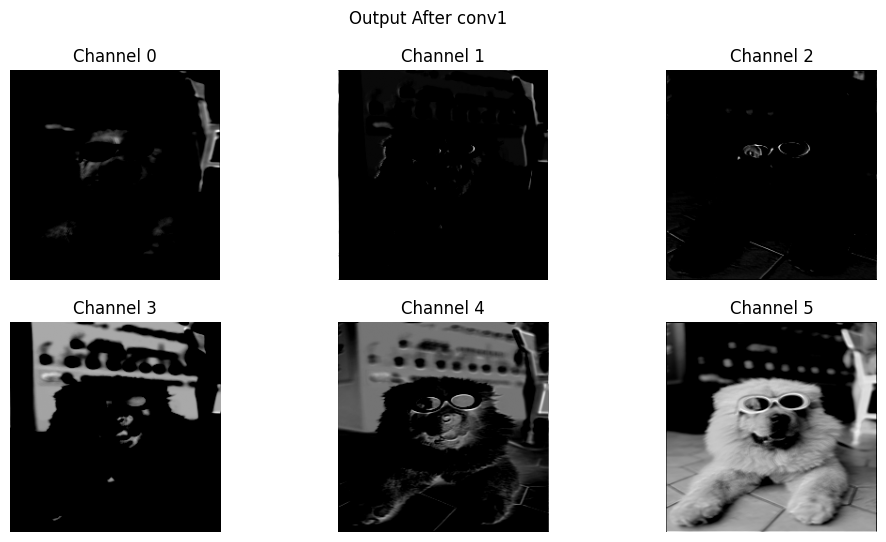

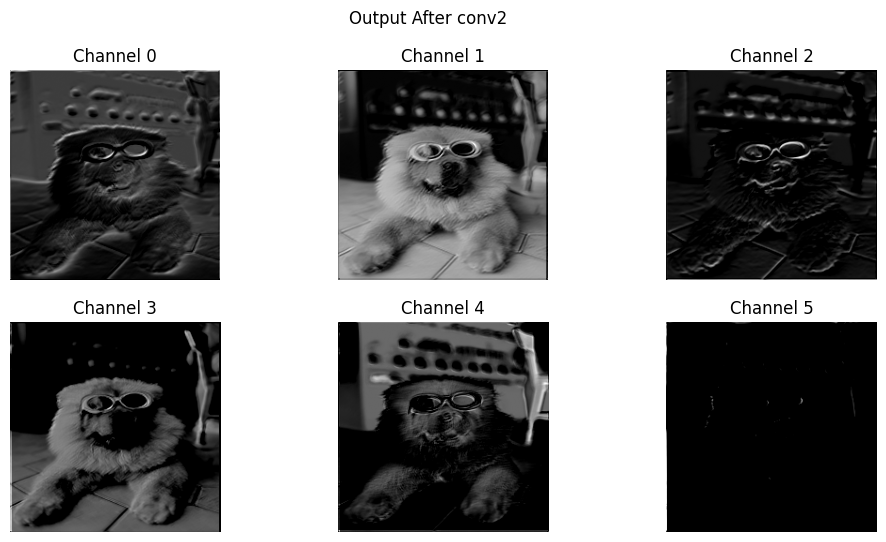

In [5]:
def visualize_features(tensor, num_channels=6, title="Conv Layer Output"):
    plt.figure(figsize=(12, 6))
    for i in range(num_channels):
        plt.subplot(2, 3, i+1)
        plt.imshow(tensor[i].cpu(), cmap='gray')
        plt.title(f'Channel {i}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

visualize_features(conv1_out, title="Output After conv1")
visualize_features(conv2_out, title="Output After conv2")
